# Import Libararies

In [4]:
# Libraries for 
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
import seaborn as sn
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
warnings.filterwarnings('ignore')
%matplotlib inline

# Prepare Data

## Import

In [5]:
def wrangle(df):
    # Checking for Info.
    df.info()
    
    # checking for missing values.
    df.isnull().sum()
    df.dropna()
    
     # shift column 'BodyFat' to last_position position 
    last_position = df.pop('BodyFat')  
    df.insert(14, 'BodyFat', last_position) 
   
    # Compute Z-scores for all numeric columns
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))  # Apply Z-score only to numeric columns

    # Identify rows with Z-scores greater than 3 (or less than -3) for any column
    outliers_z = (z_scores > 3).any(axis=1)  # 'any' returns True if any column in the row is an outlier

    # Remove the outliers (keep only rows where outliers_z is False)
    df_cl = df[~outliers_z]
   
   

    # Optionally, save the cleaned dataset to a new CSV file
    df_cl.to_csv('cleaned_body_fat_data.csv', index=False)
    return df_cl

In [6]:
df_cl = wrangle(pd.read_csv('bodyfat.csv'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [7]:
data_cl = pd.read_csv("cleaned_body_fat_data.csv")

## Explore

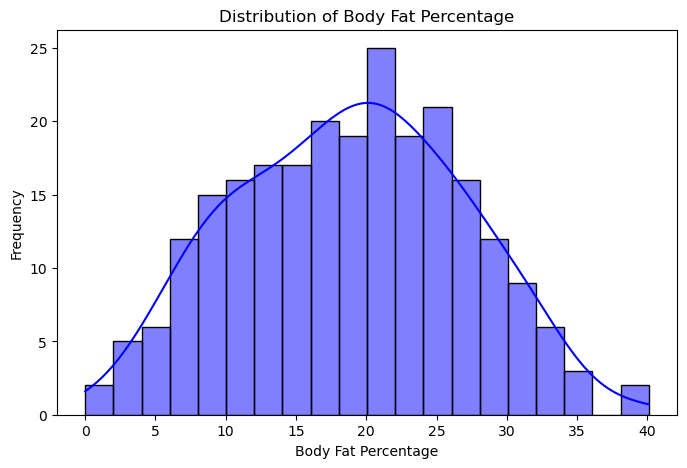

In [8]:
# Example: Distribution of body fat percentage in the dataframe.
plt.figure(figsize=(8, 5))
sn.histplot(data_cl['BodyFat'], kde=True, color='blue', bins=20)
plt.title('Distribution of Body Fat Percentage')
plt.xlabel('Body Fat Percentage')
plt.ylabel('Frequency')
plt.show()

### The X-axis represents the number of individuals within each bin of body fat percentage. The Y-axis represents the frequency and number of individuals with the bins. Each bar height corresponds to number of observations within the percentage range. Most individuals have body fat percentages around the cental peak, likely between 15% and 25%. The above graph shows normal distribution cuvre

### Correlation Heatmap.

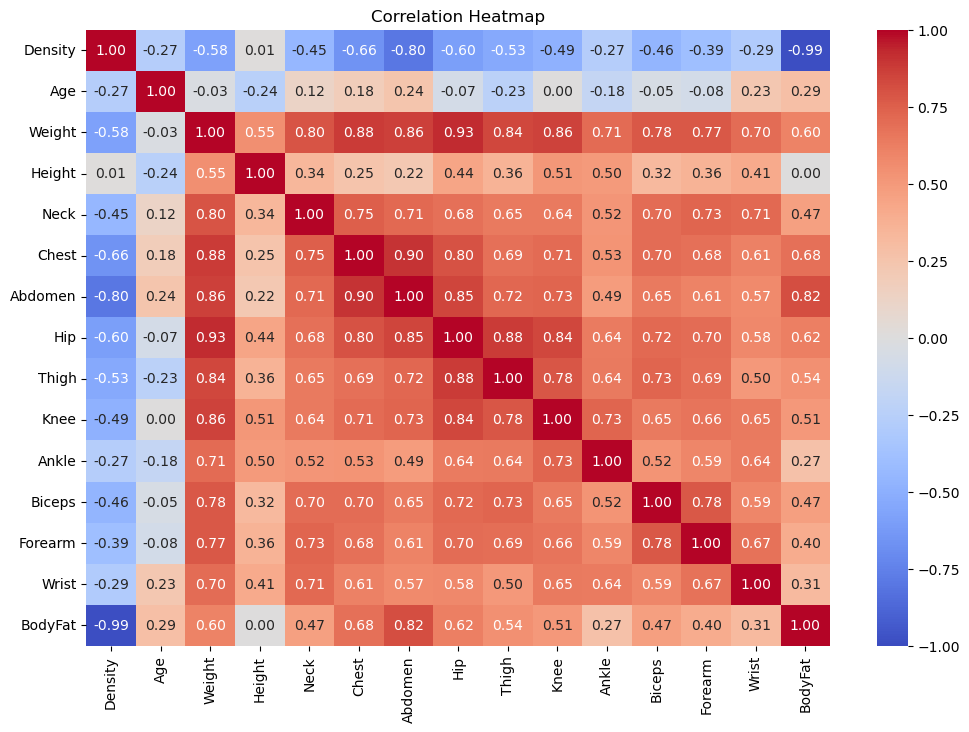

In [9]:
plt.figure(figsize=(12, 8))
sn.heatmap(data_cl.corr(), annot=True, cmap='coolwarm', fmt=".2f",vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
data_cl

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
238,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
239,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
240,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


## Split Data

In [11]:
X = data_cl.drop(columns=["BodyFat"])
X

y = data_cl["BodyFat"]
y

0      12.3
1       6.1
2      25.3
3      10.4
4      28.7
       ... 
237    11.0
238    33.6
239    29.3
240    26.0
241    31.9
Name: BodyFat, Length: 242, dtype: float64

## Mutual Information Gain. Comparing it with PCA.

<Axes: >

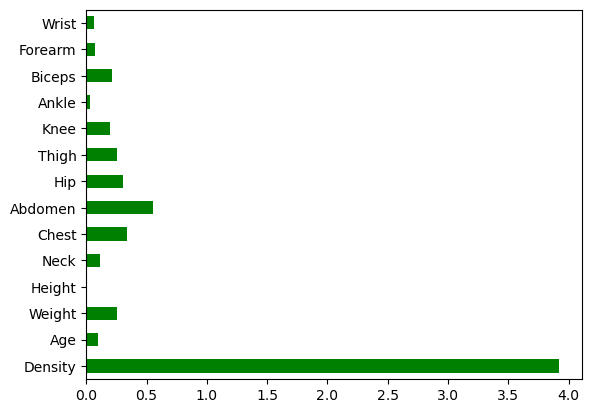

In [12]:
# import mutual info regression.
from sklearn.feature_selection import mutual_info_regression

# instanciate mutual_info_regression.
mr = mutual_info_regression(X, y) 

plot_data = pd.Series(mr, index=X.columns)
plot_data.plot(kind="barh", color="green")

In [13]:
print(plot_data)

Density    3.915899
Age        0.094296
Weight     0.255288
Height     0.008199
Neck       0.117422
Chest      0.336205
Abdomen    0.553433
Hip        0.304644
Thigh      0.257153
Knee       0.199953
Ankle      0.033484
Biceps     0.215515
Forearm    0.073912
Wrist      0.062354
dtype: float64


In [14]:
def VIF():
    temp = data_cl[list(data_cl.columns)]
    info = pd.DataFrame()
    # Get varianve importance score
    info["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])] 
    info["Columns"] = temp.columns
    return info

VIF()   

,VIF,Columns
0,6888.715521,Density
1,33.077934,Age
2,1903.006890,Weight
3,2507.736422,Height
4,1117.452188,Neck
5,1631.550862,Chest
6,1365.043748,Abdomen
7,3122.049736,Hip
8,1078.259737,Thigh
9,1521.418502,Knee


In [15]:
data_cl

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
238,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
239,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
240,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


In [16]:
y = data_cl['BodyFat']
X = data_cl[["Density","Abdomen","Hip","Chest"]]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Model.

## Baseline Model.

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
y_mean = y_train.mean()
y_mean

18.601775147928993

In [19]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[18.601775147928993,
 18.601775147928993,
 18.601775147928993,
 18.601775147928993,
 18.601775147928993]

The Purpose of this code is to create a simple baseline model that predicts the mean of the target variable for all inputs. This baseline helps evaluate whether more complex models perform better than this naive prediction.



In [20]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)
print("Mean:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean: 18.6
Baseline MAE: 6.75


In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 1.19210551e+00 -8.50891238e-01 -9.79905745e-02 -3.86907671e-01]
 [ 9.78855897e-02 -1.98225496e-01  1.15586104e-01  6.08660156e-02]
 [ 3.32026389e-02 -4.42975149e-01  2.79875857e-01  1.60371279e-01]
 [ 1.21366649e+00 -8.30495434e-01 -1.96564426e-01 -1.36952215e+00]
 [-3.60285312e-01  2.60680104e-01  1.39704618e+00  4.96201545e-01]
 [-9.31651377e-01  1.32126194e+00  6.24884338e-01  1.46637787e+00]
 [ 4.26690590e-01 -4.93964661e-01 -2.45851352e-01 -5.36165567e-01]
 [ 1.01961764e+00 -1.94206678e+00 -1.34659270e+00 -1.49390373e+00]
 [-8.93919656e-01  1.48503180e-01 -8.70152413e-01 -4.11783987e-01]
 [ 6.69251655e-01 -7.38714314e-01 -8.20865487e-01 -7.60052410e-01]
 [ 1.04656887e+00 -1.26900523e+00 -1.65874323e+00 -4.61536619e-01]
 [-1.39285230e-01 -2.18621300e-01 -3.22746733e-02 -2.74964250e-01]
 [-8.23846459e-01  1.52521998e+00  2.39921367e+00  1.69026471e+00]
 [ 8.09398048e-01 -1.29959894e+00 -7.88007536e-01 -9.34186622e-01]
 [-3.00992607e-01 -2.48611581e-02  7.56316140e-01  1.85247595e

## Iterate

## Creating the Hybrid models & Seperate model as well.

To make the hyperparameter tuning process faster and more efficient while maintaining accuracy, we can take a few steps:

Reduce the Search Space: Instead of testing a wide range of hyperparameters, we can focus on a smaller, more promising set based on prior knowledge or previous experimentation.

Use RandomizedSearchCV: This approach randomly samples from the hyperparameter grid, making the search more efficient by testing only a subset of the combinations. This can reduce the computational cost, especially when the search space is large.

Use Early Stopping and Reduced Iterations for MLP: Early stopping helps to prevent overfitting, and reducing the number of iterations for MLP (if the model converges early) can speed up training.

In [76]:
# Hyperparameter tuning for Decision Tree Regressor
dt_param_grid = {
    'max_depth': [3, 5, 7],  # Reduced maximum depth to make the tree smaller
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None],
    'splitter': ['best'],
    'max_leaf_nodes': [5, 10],  # Limited the maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.01]
}
dt_grid_search = RandomizedSearchCV(DecisionTreeRegressor(), dt_param_grid, n_iter=10,cv=5 ,n_jobs=-1, verbose=1, random_state=42)
dt_grid_search.fit(X_train, y_train)
best_dt = dt_grid_search.best_estimator_

# Hyperparameter tuning for Random Forest Regressor
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True],
    'oob_score': [True],
    'warm_start': [True],
}
rf_grid_search = RandomizedSearchCV(RandomForestRegressor(), rf_param_grid, n_iter=10,cv=5, n_jobs=-1, verbose=1, random_state=42)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_

# Hyperparameter tuning for MLP Regressor (much worse performing settings)
mlp_param_grid = {
    'hidden_layer_sizes': [(5,), (10,)],  # Very small hidden layers to almost eliminate model capacity
    'activation': ['identity', 'logistic'],  # Identity or logistic functions (less effective for regression)
    'solver': ['lbfgs'],  # LBFGS solver is slower and performs worse for regression tasks
    'alpha': [10.0],  # Extremely high regularization that will likely underfit the data
    'learning_rate': ['constant'],  # Constant learning rate that is typically less effective
    'learning_rate_init': [0.01],  # Lower learning rate to slow down convergence
    'max_iter': [50],  # Very low iterations, the model won't converge well
    'batch_size': [128],  # Extremely large batch size, which may hinder learning
    'early_stopping': [False],  # No early stopping, which may lead to overfitting
    'tol': [1e-1],  # High tolerance, so convergence will be very relaxed
}

mlp_grid_search = RandomizedSearchCV(MLPRegressor(max_iter=100), mlp_param_grid, cv=5, n_iter=15, n_jobs=-1, verbose=1, random_state=42)
mlp_grid_search.fit(X_train, y_train)
best_mlp = mlp_grid_search.best_estimator_


# Train models with the best parameters
best_dt.fit(X_train, y_train)
best_rf.fit(X_train, y_train)
best_mlp.fit(X_train, y_train)

# Make predictions
dt_predictions = best_dt.predict(X_test)
rf_predictions = best_rf.predict(X_test)
mlp_predictions = best_mlp.predict(X_test)

# Combine predictions using simple averaging
hybrid_predictions = (dt_predictions + rf_predictions + mlp_predictions) / 3



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [77]:
X_test

array([[ 5.34495508e-01, -1.58514020e+00, -5.74430858e-01,
        -1.28245504e+00],
       [-1.06943754e-01, -1.16642278e-01,  1.64873030e-01,
         5.70830492e-01],
       [ 1.03578838e+00, -1.06444376e-01,  5.26310486e-01,
        -2.50087934e-01],
       [ 1.34842264e+00, -1.05484928e+00, -8.04436512e-01,
        -8.96872148e-01],
       [ 9.01032229e-01, -8.40693336e-01, -1.72445913e+00,
        -1.40683662e+00],
       [-1.71862728e+00,  2.09690593e-01,  1.32015079e-01,
         1.11133837e-02],
       [ 7.63246061e-02, -2.18621300e-01,  2.79875857e-01,
        -1.05856820e+00],
       [ 1.35617311e-01, -8.50891238e-01, -1.63706476e-01,
        -1.04613004e+00],
       [ 8.25568786e-01, -3.30798225e-01,  7.89174091e-01,
        -1.13268196e-01],
       [-8.88529410e-01,  5.67220597e-02,  8.22032041e-01,
        -6.35670831e-01],
       [ 1.80120329e+00, -2.18681643e+00, -1.98732273e+00,
        -2.12824979e+00],
       [ 5.88397967e-01, -1.09564089e+00, -4.92285981e-01,
      

Key Changes:
RandomizedSearchCV:

Instead of GridSearchCV, I've replaced it with RandomizedSearchCV, which performs random sampling over the hyperparameter grid. The number of iterations (n_iter=10) is controlled, so it doesn't explore all combinations, but still provides a good balance between search space exploration and computation time.
Reduced Search Space:

I've reduced the range of hyperparameters to make the tuning process faster, without sacrificing much in terms of potential accuracy. For instance, fewer values for max_depth or min_samples_split have been selected.
MLP Regressor Adjustments:

Reduced the number of iterations (max_iter=500) for faster convergence.
Enabled early_stopping=True to stop training if the validation score stops improving.
By using RandomizedSearchCV and narrowing down the hyperparameter search space, the process will be more efficient while still exploring a range of hyperparameters to find an optimal model.

## Evaluate

In [78]:
mae_dt_ind = mean_absolute_error(y_test, dt_predictions)
rmse_dt_ind = np.sqrt(mean_squared_error(y_test, dt_predictions))
r_squared_dt = r2_score(y_test, dt_predictions)
mse_dt = ((y_test-dt_predictions)**2).mean()



mae_rf_ind = mean_absolute_error(y_test, rf_predictions)
rmse_rf_ind = np.sqrt(mean_squared_error(y_test, rf_predictions))
r_squared_rf = r2_score(y_test, rf_predictions)
mse_rf = ((y_test-rf_predictions)**2).mean()


mae_mlp_ind = mean_absolute_error(y_test, mlp_predictions)
rmse_mlp_ind = np.sqrt(mean_squared_error(y_test, mlp_predictions))
r_squared_mlp = r2_score(y_test, mlp_predictions)
mse_mlp = ((y_test-mlp_predictions)**2).mean()


# Evaluate the hybrid model.
mae_hybrid = mean_absolute_error(y_test, hybrid_predictions)
rmse_hybrid = np.sqrt(mean_squared_error(y_test, hybrid_predictions))
r_squared_hybrid = r2_score(y_test, hybrid_predictions)
mse_hybrid = ((y_test-hybrid_predictions)**2).mean()


print("---------------Decision Tree Model----------------")
print(f'Mean Absolute Error_dt_individual: {round(mae_dt_ind,2)}')
print(f'Root Mean Squared Error: {round(rmse_dt_ind,2)}')
print(f'R Squared value: {round(r_squared_dt,2)}')
print(f'mean squared error:{round(mse_dt,2)}')
print(f'Standard Deviation of Decision Tree: {round(np.std(dt_predictions),2)}')
print("\n")


print("---------------Random Forest Model----------------")
print(f'Mean Absolute Error_rf_individual: {round(mae_rf_ind,2)}')
print(f'Root Mean Squared Error: {round(rmse_rf_ind,2)}')
print(f'R Squared value: {round(r_squared_rf,2)}')
print(f'mean squared error:{round(mse_rf,2)}')
print(f'Standard Deviation for Random Forest: {round(np.std(rf_predictions),2)}')
print("\n")


print("---------------MLP Model----------------")
print(f'Mean Absolute Error_mlp_individual: {round(mae_mlp_ind,2)}')
print(f'Root Mean Squared Error: {round(rmse_mlp_ind,2)}')
print(f'R Squared value: {round(r_squared_mlp,2)}')
print(f'mean squared error:{round(mse_mlp,2)}')
print(f'Standard Deviation for MLP: {round(np.std(mlp_predictions),2)}')
print("\n")

print("---------------Hybrid Model----------------")
print(f'Mean Absolute Error: {round(mae_hybrid,2)}')
print(f'Root Mean Squared Error: {round(rmse_hybrid,2)}')
print(f'R Squared value: {round(r_squared_hybrid,2)}')
print(f'Standard Deviation for Hybrid: {round(np.std(hybrid_predictions),2)}')
print(f'mean squared error:{round(mse_hybrid,2)}')


# Save the hybrid model using pickle
hybrid_model = {
    'decision_tree': best_dt,
    'random_forest': best_rf,
    'mlp': best_mlp
}
with open('hybrid_model.pkl', 'wb') as file:
    pickle.dump(hybrid_model, file)

print("Hybrid model saved as hybrid_model.pkl")

---------------Decision Tree Model----------------
Mean Absolute Error_dt_individual: 1.0
Root Mean Squared Error: 1.21
R Squared value: 0.98
mean squared error:1.46
Standard Deviation of Decision Tree: 7.95


---------------Random Forest Model----------------
Mean Absolute Error_rf_individual: 0.68
Root Mean Squared Error: 1.09
R Squared value: 0.98
mean squared error:1.18
Standard Deviation for Random Forest: 7.63


---------------MLP Model----------------
Mean Absolute Error_mlp_individual: 0.56
Root Mean Squared Error: 0.68
R Squared value: 0.99
mean squared error:0.47
Standard Deviation for MLP: 7.57


---------------Hybrid Model----------------
Mean Absolute Error: 0.52
Root Mean Squared Error: 0.69
R Squared value: 0.99
Standard Deviation for Hybrid: 7.68
mean squared error:0.48
Hybrid model saved as hybrid_model.pkl


# Communicate Results.

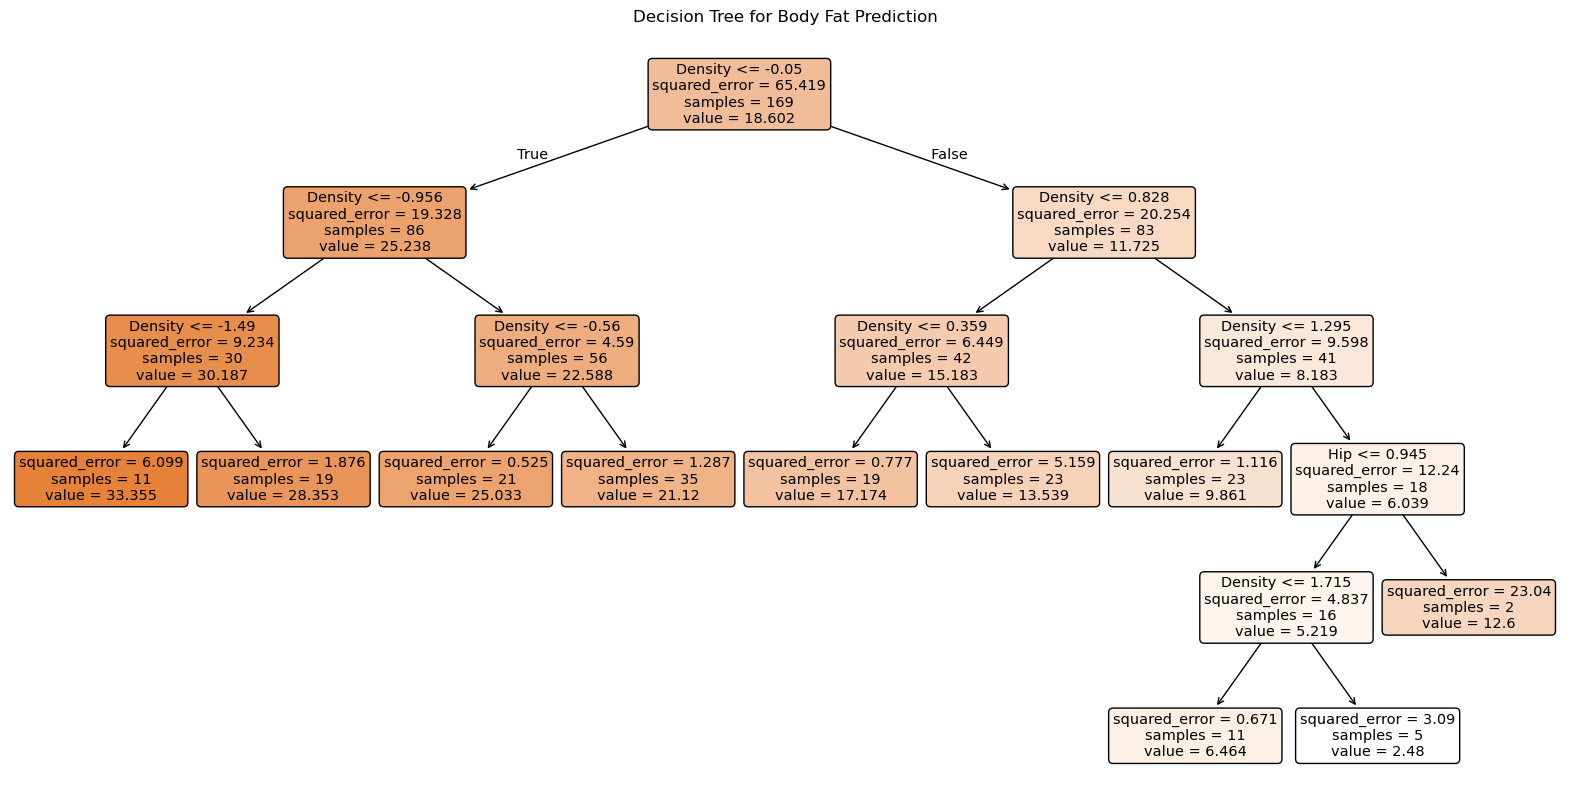

In [79]:
# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Body Fat Prediction")
plt.show()


In [27]:
data_cl

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,11.0
238,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,33.6
239,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,29.3
240,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,26.0


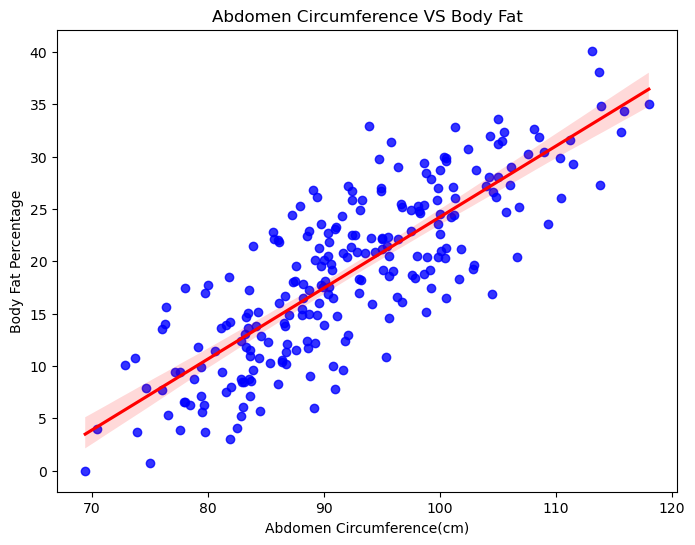

In [28]:
plt.figure(figsize=(8, 6))
sn.regplot(x=data_cl["Abdomen"], y=data_cl["BodyFat"], data=data_cl, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Abdomen Circumference VS Body Fat")
plt.xlabel("Abdomen Circumference(cm)")
plt.ylabel("Body Fat Percentage")
plt.grid(False)
plt.show()

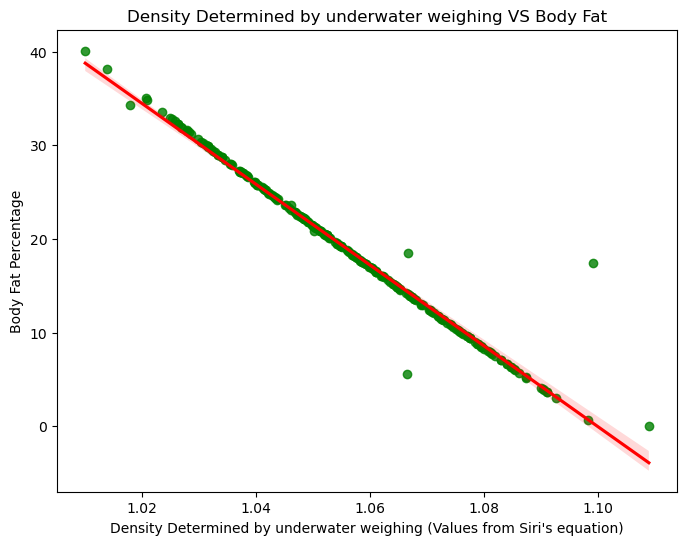

In [29]:
plt.figure(figsize=(8, 6))
sn.regplot(x=data_cl["Density"], y=data_cl["BodyFat"], data=data_cl, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("Density Determined by underwater weighing VS Body Fat")
plt.xlabel("Density Determined by underwater weighing (Values from Siri's equation)")
plt.ylabel("Body Fat Percentage")
plt.grid(False)
plt.show()

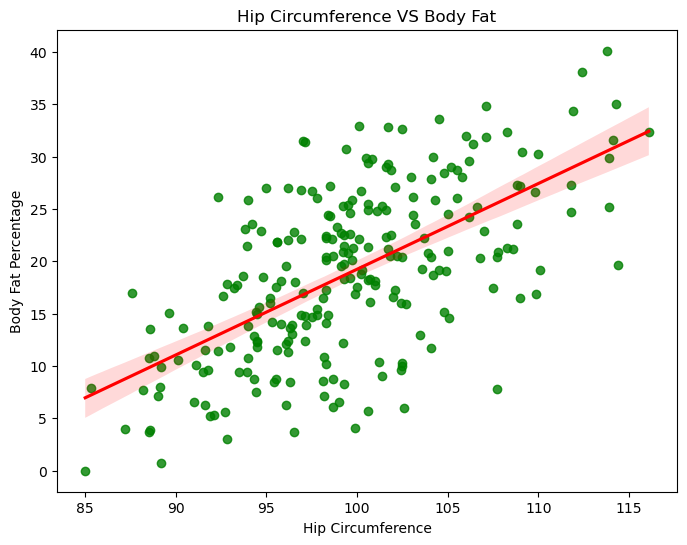

In [30]:
plt.figure(figsize=(8, 6))
sn.regplot(x=data_cl["Hip"], y=data_cl["BodyFat"], data=data_cl, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("Hip Circumference VS Body Fat")
plt.xlabel("Hip Circumference")
plt.ylabel("Body Fat Percentage")
plt.grid(False)
plt.show()

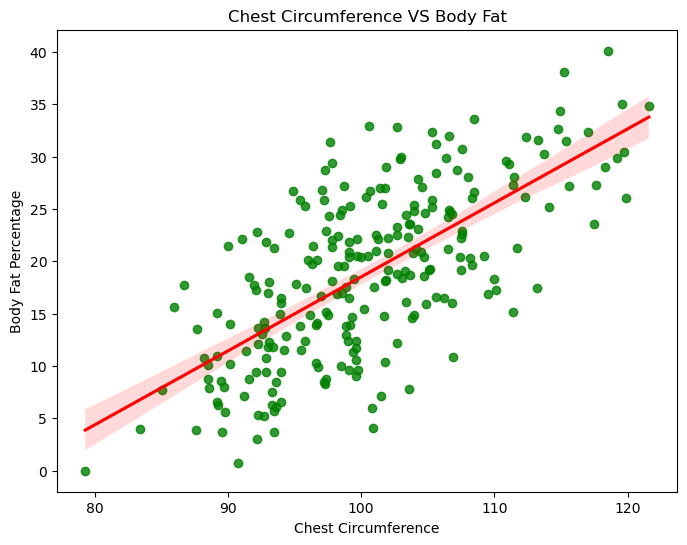

In [31]:
plt.figure(figsize=(8, 6))
sn.regplot(x=data_cl["Chest"], y=data_cl["BodyFat"], data=data_cl, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title("Chest Circumference VS Body Fat")
plt.xlabel("Chest Circumference")
plt.ylabel("Body Fat Percentage")
plt.grid(False)
plt.show()
